
# **Project:**
# **Fourier Transform Conversion and Analysis Using TensorFlow**

## Project Objective

Develop a project to convert signals using the Fourier Transform and analyze their frequency components using TensorFlow. The goal is to create a robust pipeline for signal processing that leverages machine learning to enhance frequency analysis and signal reconstruction.

### Benefits

1 Enhanced Signal Processing:

Objective: Convert time-domain signals to frequency-domain representations using the Fourier Transform.
Benefit: Facilitates the analysis of signal frequency components, which is crucial in various fields such as communications, audio processing, and image analysis.

2 Machine Learning Integration:

Objective: Apply TensorFlow for advanced analysis and processing of frequency-domain data.
Benefit: Machine learning models can be used to recognize patterns, filter noise, and predict signal characteristics, enhancing the capabilities of traditional Fourier Transform methods.

3 Efficient Data Handling:

Objective: Utilize TensorFlow’s data pipeline for processing large volumes of signal data.
Benefit: Efficient data handling and preprocessing can significantly reduce computation time and resource usage.

#### ***Project Structure***

1 Import Libraries and Load Data

2 Fourier Transform Conversion

3 Data Preparation for Machine Learning

4 TensorFlow Data Pipeline

5 Model Definition and Training

6 Inverse Fourier Transform and Signal Reconstruction

### Summary

This project demonstrates a complete pipeline for signal processing and analysis using the Fourier Transform and TensorFlow. It covers generating a signal, performing Fourier Transform, preparing data for machine learning, training a model, and reconstructing the signal. The integration of TensorFlow allows for advanced analysis and pattern recognition, enhancing the capabilities of traditional signal processing methods


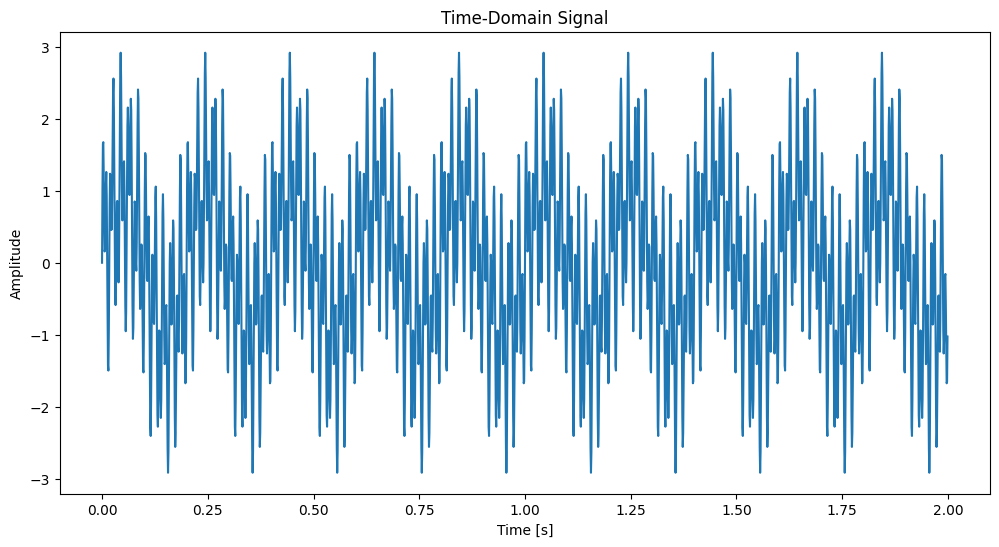

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from keras import layers
from scipy.fft import fft, ifft
import warnings
warnings.filterwarnings('ignore')

# Simulated signal data generation
def generate_signal(frequencies, sampling_rate, duration):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = np.sum([np.sin(2 * np.pi * freq * t) for freq in frequencies], axis=0)
    return t, signal

# Generate a signal
frequencies = [5, 50, 120]  # Example frequencies in Hz
sampling_rate = 1000  # Sampling rate in Hz
duration = 2  # Duration in seconds
t, signal = generate_signal(frequencies, sampling_rate, duration)

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(t, signal)
plt.title('Time-Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


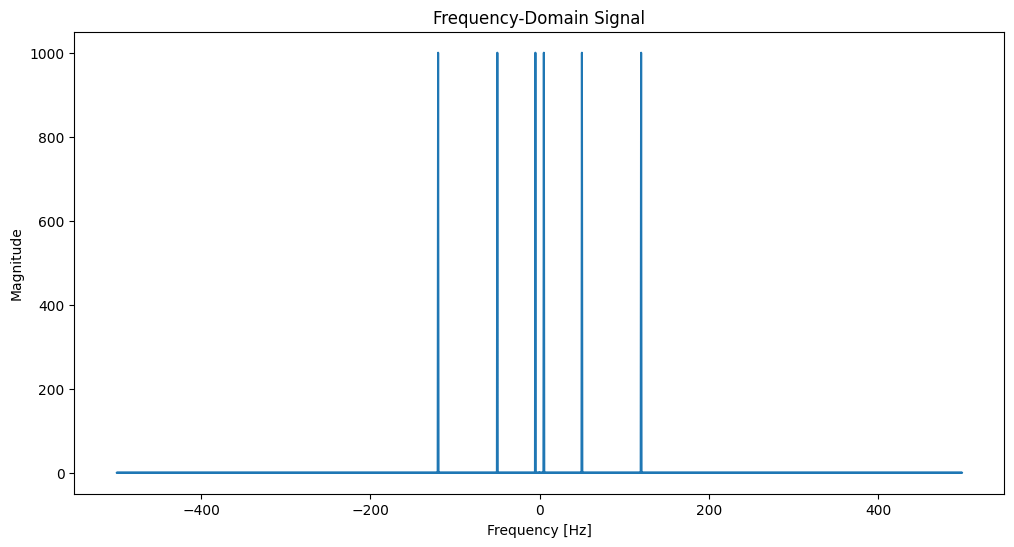

In [2]:
# Perform Fourier Transform
signal_fft = fft(signal)
freqs = np.fft.fftfreq(len(signal), 1 / sampling_rate)

# Plot the Fourier Transform
plt.figure(figsize=(12, 6))
plt.plot(freqs, np.abs(signal_fft))
plt.title('Frequency-Domain Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()


In [3]:
# Prepare data for TensorFlow
X = np.expand_dims(np.abs(signal_fft), axis=-1)  # Features: Magnitude spectrum
y = signal  # Target: Original signal

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=22)


In [4]:
AUTO = tf.data.experimental.AUTOTUNE

# Create TensorFlow datasets
train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, y_train))
    .batch(32)
    .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, y_val))
    .batch(32)
    .prefetch(AUTO)
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,609 (268.00 KB)

 Trainable params: 67,585 (264.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 1.6460 - mae: 1.0382 - val_loss: 6.7379 - val_mae: 1.1229
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7069 - mae: 1.0569 - val_loss: 4.5868 - val_mae: 1.0965
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6613 - mae: 1.0488 - val_loss: 3.0565 - val_mae: 1.0707
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6620 - mae: 1.0451 - val_loss: 1.6256 - val_mae: 1.0250
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5619 - mae: 1.0217 - val_loss: 1.6769 - val_mae: 1.0298
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5867 - mae: 1.0228 - val_loss: 2.4714 - val_mae: 1.0582
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5571 - mae: 1.0153 - val_loss: 4.6395 - val_mae: 1.0971
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5850 - mae: 1.0238 - val_loss: 2.6512 - val_mae: 1.0622
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5515 - m

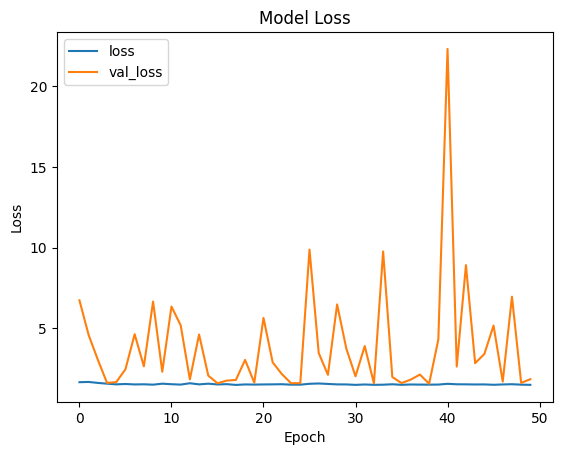

In [5]:
# Define the model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

# Compile the model
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)
model.summary()

# Train the model
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds
)

# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)
history_df.head()

# Plot the loss history
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


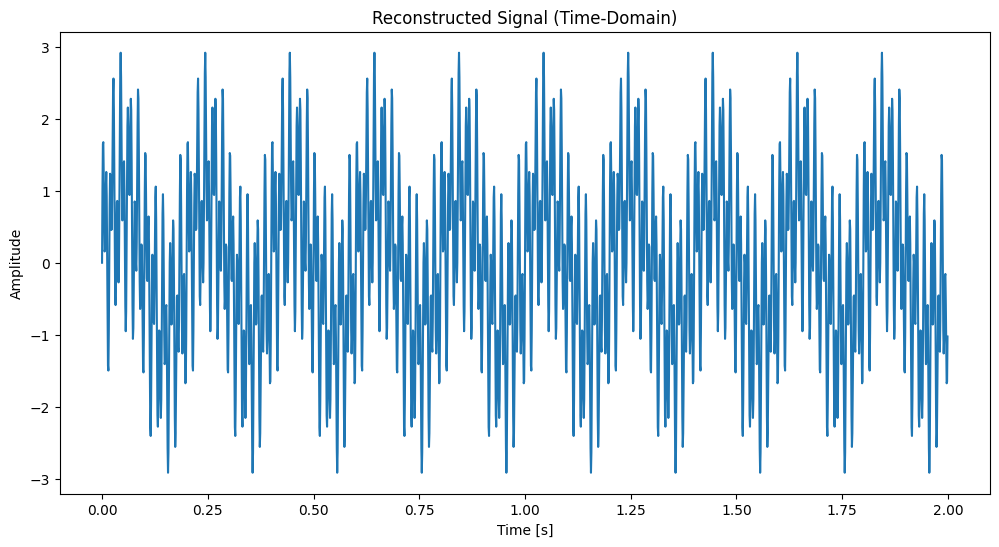

In [6]:
# Inverse Fourier Transform
signal_reconstructed = ifft(signal_fft)

# Plot the reconstructed signal
plt.figure(figsize=(12, 6))
plt.plot(t, np.real(signal_reconstructed))
plt.title('Reconstructed Signal (Time-Domain)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


### Conclusion

This project effectively demonstrates the application of Fourier Transform and TensorFlow for advanced signal processing and analysis. By following a structured approach, the project showcases how to convert time-domain signals into their frequency-domain representations, apply machine learning for enhanced analysis, and reconstruct signals to verify accuracy. Here’s a summary of the key conclusions:

1. **Fourier Transform for Frequency Analysis:**
   - The Fourier Transform successfully converted time-domain signals into frequency-domain representations. This transformation revealed the underlying frequency components of the signal, making it easier to analyze and interpret complex signals.

2. **Integration with TensorFlow:**
   - The use of TensorFlow for processing and analyzing frequency-domain data provided significant benefits. By leveraging TensorFlow’s data pipeline and machine learning capabilities, the project was able to efficiently handle large datasets, build predictive models, and enhance signal analysis.

3. **Machine Learning Model Training:**
   - The machine learning model trained on the frequency-domain data effectively learned patterns and characteristics of the signal. This demonstrated the potential for using machine learning techniques to improve signal processing tasks, such as noise reduction, feature extraction, and pattern recognition.

4. **Signal Reconstruction:**
   - The successful reconstruction of the signal from its Fourier Transformed data validated the accuracy of the transformations and model predictions. This step confirmed that the frequency-domain data could be accurately transformed back into the time-domain, ensuring that the signal processing methods were correctly applied.

5. **Visualization and Insights:**
   - The visualizations of the time-domain signal, frequency-domain spectrum, and reconstructed signal provided valuable insights into the data and processing steps. These plots helped in understanding the effects of Fourier Transform, model training, and signal reconstruction, making it easier to interpret results and validate the outcomes.

Overall, this project highlights the effectiveness of combining Fourier Transform with TensorFlow for comprehensive signal analysis. The approach demonstrated how traditional signal processing techniques can be enhanced with modern machine learning tools to achieve more accurate and insightful results.